<a href="https://colab.research.google.com/github/ryu-i-engineer/ImageAnnotationChallenge/blob/main/notebooks/ImageAnnotationChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ImageAnnotationChallenge

## Overview : 概要

### Project target : プロジェクト目標

- 普通のECサイトにおける検索機能について､改善方法を検討する
- 画像認識によるタグ付けの開発を優先する
- メンバーも実際のプロジェクト経験をもらいつつ､デモプロジェクトの開発と記事を作成できるまで頑張る

In English:
- Consider the ways how to improve search function on e-commerce site.
- Prioritize the development of tagging by image recognition.
- The members will do our best until creating an article and developing demo project, gaining project experience.


### Study scope : 学習範囲

* Note記事を書く
* 画像認識によるタグ付けを優先して開発する
* 日本語･英語両方タグ付けできるようにする

In English:

* Write a note article
* Develop tagging system by image recognition in priority
* The system becomes able to tag  in Japanese and English


### Repository

* [TOP](https://github.com/ryu-i-engineer/ImageAnnotationChallenge)
* [Projects](https://github.com/ryu-i-engineer/ImageAnnotationChallenge/projects/2)

## Reference

- [転移学習：機械学習の次のフロンティアへの招待](https://qiita.com/icoxfog417/items/48cbf087dd22f1f8c6f4#%E8%BB%A2%E7%A7%BB%E5%AD%A6%E7%BF%92%E3%81%AE%E5%8F%96%E3%82%8A%E7%B5%84%E3%82%80%E5%95%8F%E9%A1%8C)
- [Transfer learning with TensorFlow Hub](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub)
- [Image segmentation](https://www.tensorflow.org/tutorials/images/segmentation)
- [13_semi_supervised_learning](https://colab.research.google.com/github/machine-perception-robotics-group/MPRGDeepLearningLectureNotebook/blob/master/11_cnn_pytorch/13_semi_supervised_learning.ipynb?authuser=0#scrollTo=tPyzEOSCUTI1)
- [Semi-supervised image classification using contrastive pretraining with Sim CLR](https://keras.io/examples/vision/semisupervised_simclr/)
- [Self-training with Noisy Student improves ImageNet classification](https://arxiv.org/pdf/1911.04252.pdf)
- [Google-Research Noisy Student](https://github.com/google-research/noisystudent)
-[Qiita: Keras Noisy studentを実装してみた](https://qiita.com/rabbitcaptain/items/a15591ca49dc428223ca)


### Others
- [Vision Transformer and MLP-Mixer Architectures](https://github.com/google-research/vision_transformer)
- [Image classification with Vision Transformer](https://keras.io/examples/vision/image_classification_with_vision_transformer/)
- [ResNet - PyTorch](https://rwightman.github.io/pytorch-image-models/models/resnet/)
- [Noisy Student (EfficientNet)](https://rwightman.github.io/pytorch-image-models/models/noisy-student/)
- [Multi-label classification with PyTorch](https://github.com/aman5319/Multi-Label/blob/master/Classify_scenes.ipynb)

## Screw types

### Reference

https://www.homestratosphere.com/types-of-screws/

#### Overview

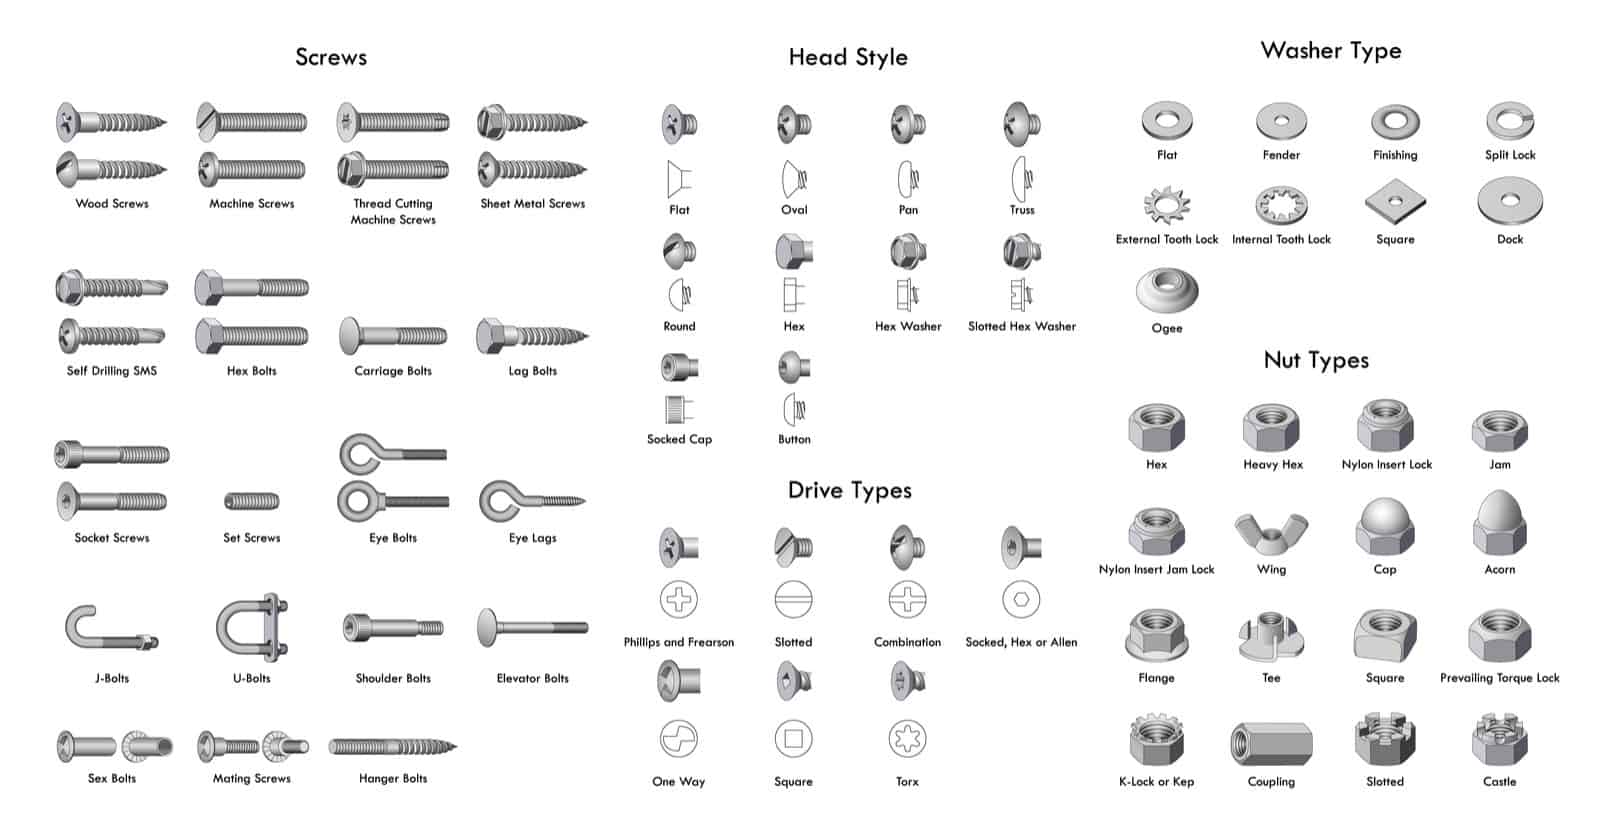

## Dummy data

- 3D
- CAD
- Items should not be there.
- Utilities something like "Accessories" and "Components"

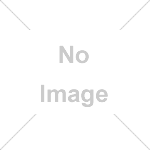
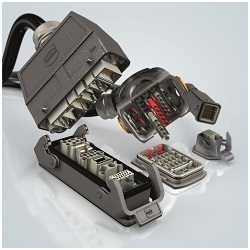
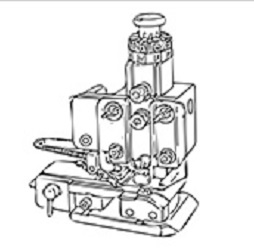
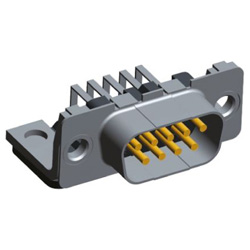

## Define lables and binarize

#### CSV format

```csv
"directory","filename","tag1","tag2","tag3","tag4","tag5","tag6","tag7","tag8","tag9","tag10"
"nuts","test.jpg","nuts","metal","hex",
"bolts","test2.jpg","nuts","non-metal","screws","flat"
```

#### Code

In [1]:
import pandas as pd
df = pd.read_csv("./inputs/miml_dataset/miml_labels_1.csv")
# df = pd.read_csv("./inputs/fasteners/nuts_label.csv")
df.dropna(axis=1, how="all")

Filenames  desert  mountains  sea  sunset  trees
0        1.jpg       1          0    0       0      0
1        2.jpg       1          0    0       0      0
2        3.jpg       1          0    0       0      0
3        4.jpg       1          1    0       0      0
4        5.jpg       1          0    0       0      0
...        ...     ...        ...  ...     ...    ...
1995  1996.jpg       0          0    0       0      1
1996  1997.jpg       0          0    0       0      1
1997  1998.jpg       0          0    0       0      1
1998  1999.jpg       0          0    0       0      1
1999  2000.jpg       0          0    0       0      1

[2000 rows x 6 columns]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

df = df.dropna(axis=1, how='all') # save memory and process usage
df = df.fillna('None') # to avoid error

result = mlb.fit_transform(df.drop(columns=['directory', 'filename']).values) # drop not tagging cols

bin_df = pd.DataFrame(result, columns=mlb.classes_).drop('None', axis=1) # drop non-useless col.
bin_df = df.drop(df.columns[2:], axis=1).join(bin_df)
bin_df.head()

directory    filename  6 Lobe Head  Allen  Aluminum  Binding  Black  Blue  \
0     screw  000000.jpg            0      0         0        0      0     0   
1     screw  000001.jpg            0      0         0        0      0     0   
2     screw  000002.jpg            0      0         0        0      0     0   
3     screw  000003.jpg            0      0         0        0      0     1   
4     screw  000004.jpg            0      0         0        0      0     1   

   Bolt  Brass  ...  Torx 6 Lobe Screw  Truss Head  Type-17 point  \
0     0      0  ...                  0           0              0   
1     0      0  ...                  0           0              0   
2     0      0  ...                  0           0              0   
3     0      0  ...                  0           0              0   
4     0      0  ...                  0           0              0   

   Type-17 point hi-lo  Washer Head  White  Wood Screw  Yellow  \
0                    0            0      0           0       0   
1                    0            0      0           0       0   
2                    0            0      0           0       0   
3                    0            0      0           0       0   
4                    0            0      0           0       0   

   Zinc Plated Steel  non drive  
0                  0          0  
1                  0          0  
2                  0          0  
3                  0          0  
4                  0          0  

[5 rows x 88 columns]

In [ ]:
N = len(df)

just_num = max(len(l) for l in bin_df.drop(['directory', 'filename'], axis=1).columns)+1

for k, label in enumerate(bin_df.drop(['directory', 'filename'], axis=1).columns):
    pos = sum(bin_df[label] == 1)
    print(f"{label.ljust(just_num)}\tPos samples: {pos:<5}\tNeg samples: {N-pos:<5} \t Pos of total: {100 * pos / N:.2f}%")

6 Lobe Head                         	Pos samples: 6    	Neg samples: 3792  	 Pos of total: 0.16%
Allen                               	Pos samples: 1062 	Neg samples: 2736  	 Pos of total: 27.96%
Aluminum                            	Pos samples: 15   	Neg samples: 3783  	 Pos of total: 0.39%
Binding                             	Pos samples: 3    	Neg samples: 3795  	 Pos of total: 0.08%
Black                               	Pos samples: 309  	Neg samples: 3489  	 Pos of total: 8.14%
Blue                                	Pos samples: 17   	Neg samples: 3781  	 Pos of total: 0.45%
Bolt                                	Pos samples: 3    	Neg samples: 3795  	 Pos of total: 0.08%
Brass                               	Pos samples: 147  	Neg samples: 3651  	 Pos of total: 3.87%
Bronze                              	Pos samples: 93   	Neg samples: 3705  	 Pos of total: 2.45%
Brown                               	Pos samples: 9    	Neg samples: 3789  	 Pos of total: 0.24%
Bugle Head                   

In [88]:
N = len(df)

just_num = max(len(l) for l in df.drop(['Filenames'], axis=1).columns)+1

for k, label in enumerate(df.drop(['Filenames'], axis=1).columns):
    pos = sum(df[label] == 1)
    print(f"{label.ljust(just_num)}\tPos samples: {pos:<5}\tNeg samples: {N-pos:<5} \t Pos of total: {100 * pos / N:.2f}%")

desert    	Pos samples: 409  	Neg samples: 1591  	 Pos of total: 20.45%
mountains 	Pos samples: 493  	Neg samples: 1507  	 Pos of total: 24.65%
sea       	Pos samples: 655  	Neg samples: 1345  	 Pos of total: 32.75%
sunset    	Pos samples: 475  	Neg samples: 1525  	 Pos of total: 23.75%
trees     	Pos samples: 624  	Neg samples: 1376  	 Pos of total: 31.20%


#### Tag list

- [Fasterner(wiki)](https://en.wikipedia.org/wiki/Fastener)
- [Nuts(wiki)](https://en.wikipedia.org/wiki/Nut_(hardware))
- [Wahser(wiki)](https://en.wikipedia.org/wiki/Washer_(hardware))
- [Electrical cable(wiki)](https://en.wikipedia.org/wiki/Electrical_cable)

## Codes

#### Prepare

In [2]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub
import tensorflow_addons as tfa

import datetime

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6937665159531080965
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4851040256
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10118240385331060628
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


### Load dataset

In [ ]:
LABELS = bin_df.columns[2:].to_list()
LABELS[:5]

['6 Lobe Head', 'Allen', 'Aluminum', 'Binding', 'Black']

In [3]:
LABELS = df.columns[1:].to_list()
LABELS[:5]

['desert', 'mountains', 'sea', 'sunset', 'trees']

In [ ]:
import glob, os
data_dir = "./inputs/fasteners/screw"
# data_dir = "./inputs/fasteners/nut"
filenames = glob.glob(os.path.join(data_dir, "*.jpg"))

In [4]:
import glob, os
data_dir = "./inputs/miml_dataset/images"
filenames = glob.glob(os.path.join(data_dir, "*.jpg"))

In [5]:
ds_size = len(filenames)
print("Number of images in folders: ", ds_size)

filelist_ds = tf.data.Dataset.from_tensor_slices(filenames[:])

ds_size=filelist_ds.cardinality().numpy()
print("Number of selected samples for dataset: ", ds_size)

Number of images in folders:  2000
Number of selected samples for dataset:  2000


In [25]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  file_name= parts[-1]
  return tf.squeeze(bin_df[bin_df['filename']==file_name][LABELS])

In [6]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  file_name= parts[-1]
  return tf.squeeze(df[df['Filenames']==file_name][LABELS])

In [7]:
IMG_WIDTH, IMG_HEIGHT = 224 , 224
def decode_img(img):
  #color images
  img = tf.image.decode_jpeg(img, channels=3) 
  #convert unit8 tensor to floats in the [0,1]range
  img = tf.image.convert_image_dtype(img, tf.float32)
  #resize
  img = tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])
  return img

In [8]:
def combine_images_labels(file_path: tf.Tensor):
  label = get_label(file_path)
  label = tf.cast(label, tf.int64)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [9]:
train_ratio = 0.80
ds_train=filelist_ds.take(ds_size*train_ratio)
ds_val=filelist_ds.skip(ds_size*train_ratio)

In [10]:
BATCH_SIZE = 16

In [11]:
ds_train=ds_train.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)

In [12]:
ds_val= ds_val.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)

In [13]:
def covert_onehot_string_labels(label_string,label_onehot):
  labels=[]
  for i, label in  enumerate(label_string):
     if label_onehot[i]:
       labels.append(label)
  if len(labels)==0:
    labels.append("NONE")
  return labels

In [63]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(IMG_WIDTH, IMG_HEIGHT),
        layers.RandomCrop(IMG_WIDTH, IMG_HEIGHT),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.05),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

9 samples from the dataset


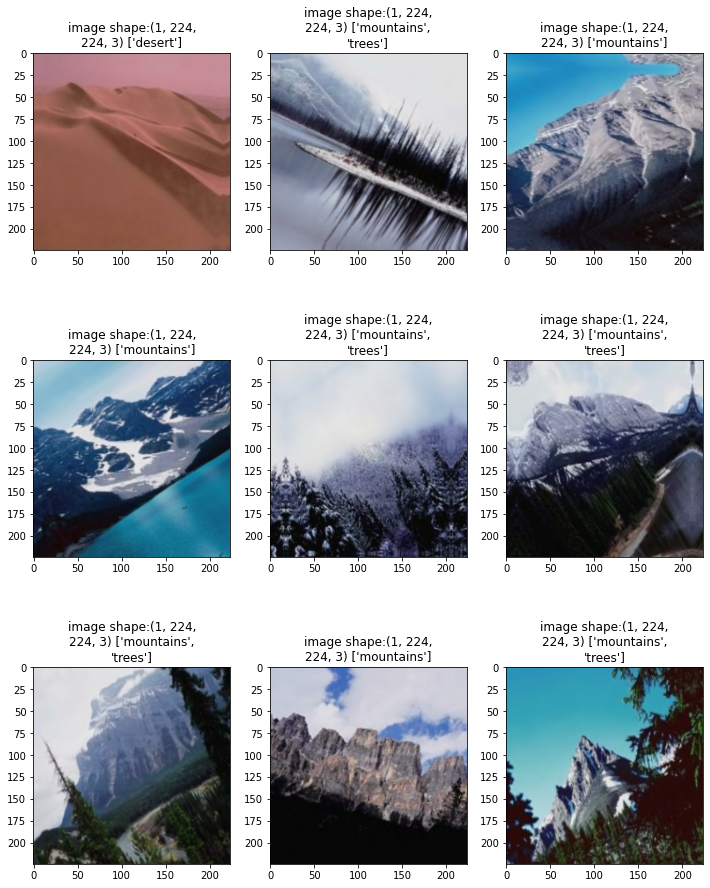

In [62]:
from textwrap import wrap

def show_samples(dataset):
  fig=plt.figure(figsize=(12, 16))
  columns = 3
  rows = 3
  print(columns*rows,"samples from the dataset")
  i=1
  for a,b in dataset.take(columns*rows): 
    fig.add_subplot(rows, columns, i)
    a = data_augmentation(tf.expand_dims(a, 0))
    plt.imshow(np.squeeze(a))
    plt.title('\n'.join(wrap("image shape:"+ str(a.shape)+" "+ 
              str(covert_onehot_string_labels(LABELS,b.numpy())), 24)))
    i=i+1
  plt.show()
show_samples(ds_val)

In [15]:
ds_train_batched=ds_train.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE) 
ds_val_batched=ds_val.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE)

print("Number of batches in train: ", ds_train_batched.cardinality().numpy())
print("Number of batches in test: ",  ds_val_batched.cardinality().numpy())

Number of batches in train:  100
Number of batches in test:  25


### Create model

In [64]:
mobilenet_v3 = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"
efficient_v2 = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2"

feature_extractor_model = efficient_v2

In [65]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(IMG_WIDTH, IMG_HEIGHT, 3),
    trainable=False,
    # arguments=dict(batch_norm_momentum=0.997)
)

In [73]:
num_classes = len(LABELS)

inputs = tf.keras.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
x = data_augmentation(inputs)
x = feature_extractor_layer(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)

model = tf.keras.Model(inputs, x)
model.build([None, IMG_WIDTH, IMG_HEIGHT, 3])

#### Create custom loss function

In [ ]:
weight_balanced = []
N = len(bin_df)

for k, label in enumerate(bin_df.drop(['directory', 'filename'], axis=1).columns):
    weight_balanced.append((bin_df[label] == 1).sum())

max_count = max(weight_balanced)

for i in range(len(weight_balanced)):
    weight_balanced[i] = max_count / weight_balanced[i]

weight_balanced = tf.constant(weight_balanced, dtype=tf.float32)
for label, weight in zip(LABELS, weight_balanced):
    print(f"{label.ljust(15)}\t{weight}")

<tf.Tensor: shape=(86,), dtype=float32, numpy=
array([496.5      ,   2.8050847, 198.6      , 993.       ,   9.640777 ,
       175.23529  , 993.       ,  20.265306 ,  32.032257 , 331.       ,
        48.048386 , 248.25     ,  10.67742  ,  20.832169 ,  31.03125  ,
       331.       ,  62.0625   , 141.85715  ,  12.4125   , 248.25     ,
       165.5      , 993.       ,  33.1      ,   3.977303 , 993.       ,
       993.       , 993.       , 248.25     ,  26.131578 , 124.125    ,
        90.27273  , 993.       ,   5.674286 ,   2.3401413,  14.185715 ,
        82.75     , 198.6      , 248.25     , 141.85715  ,  41.375    ,
       993.       ,   1.8653725, 993.       ,   9.280374 , 993.       ,
       141.85715  ,  16.55     , 198.6      ,   6.2584033, 248.25     ,
         4.2557144, 165.5      , 124.125    ,  19.096153 ,  27.583334 ,
       372.375    , 496.5      , 110.333336 ,   9.548077 ,   7.5227275,
       993.       , 198.6      ,   1.       , 331.       ,   8.415255 ,
        26.837837

In [19]:
weight_balanced = []
N = len(df)

for k, label in enumerate(df.drop(['Filenames'], axis=1).columns):
    weight_balanced.append((df[label] == 1).sum())

max_count = max(weight_balanced)

for i in range(len(weight_balanced)):
    weight_balanced[i] = max_count / weight_balanced[i]

weight_balanced = tf.constant(weight_balanced, dtype=tf.float32)
for label, weight in zip(LABELS, weight_balanced):
    print(f"{label.ljust(15)}\t{weight}")

desert         	1.6014670133590698
mountains      	1.3286004066467285
sea            	1.0
sunset         	1.378947377204895
trees          	1.0496795177459717


In [20]:
# create custom loss function
def custom_weighted_bce(y_true, y_pred):
    loss = tf.nn.weighted_cross_entropy_with_logits(tf.cast(y_true, tf.float32), y_pred, weight_balanced)
    return tf.reduce_mean(loss, axis=-1)

In [74]:
model.compile(
  optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0005),
  loss=custom_weighted_bce,
  metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      7         
 al)                                                             
                                                                 
 keras_layer_4 (KerasLayer)  (None, 1280)              207615832 
                                                                 
 flatten_16 (Flatten)        (None, 1280)              0         
                                                                 
 layer_normalization_12 (Lay  (None, 1280)             2560      
 erNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 1280)              0   

#### Train model

In [75]:
NUM_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0.001, patience=5
)

history = model.fit(ds_train_batched,
                    validation_data=ds_val_batched,
                    epochs=NUM_EPOCHS,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/100
100/100 [==============================] - 70s 605ms/step - loss: 0.7566 - binary_accuracy: 0.7369 - val_loss: 0.7204 - val_binary_accuracy: 0.7540
Epoch 2/100
100/100 [==============================] - 56s 565ms/step - loss: 0.6937 - binary_accuracy: 0.8416 - val_loss: 0.7068 - val_binary_accuracy: 0.7950
Epoch 3/100
100/100 [==============================] - 56s 566ms/step - loss: 0.6750 - binary_accuracy: 0.8821 - val_loss: 0.6734 - val_binary_accuracy: 0.8795
Epoch 4/100
100/100 [==============================] - 57s 568ms/step - loss: 0.6598 - binary_accuracy: 0.9142 - val_loss: 0.6677 - val_binary_accuracy: 0.8920
Epoch 5/100
100/100 [==============================] - 57s 569ms/step - loss: 0.6552 - binary_accuracy: 0.9240 - val_loss: 0.6543 - val_binary_accuracy: 0.9110
Epoch 6/100
100/100 [==============================] - 57s 571ms/step - loss: 0.6495 - binary_accuracy: 0.9334 - val_loss: 0.6507 - val_binary_accuracy: 0.9180
Epoch 7/100
100/100 [===================

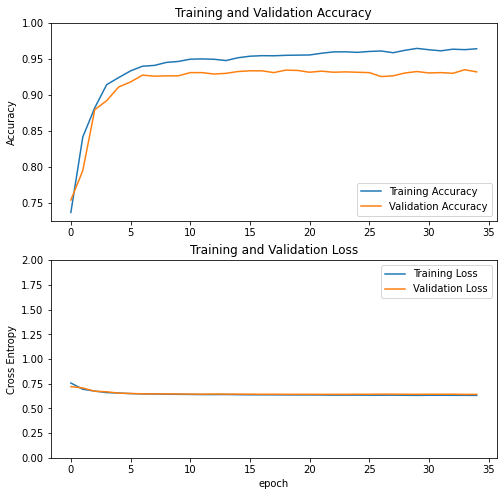

In [76]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluate

In [77]:
ds=ds_val
predictions= model.predict(ds.batch(batch_size=10).take(1))
# print("A sample output from the last layer (model) ", predictions[0])
y=[]
print("10 Sample predictions:")
for (pred,(a,b)) in zip(predictions,ds.take(10)):
  pred[pred>0.5]=1
  pred[pred<=0.5]=0
  print("predicted    : " , str(covert_onehot_string_labels(LABELS, pred)))
  print("Actual Label: ", str(covert_onehot_string_labels(LABELS,b.numpy())))
  print("")
  y.append(b.numpy())

10 Sample predictions:
predicted    :  ['mountains', 'trees']
Actual Label:  ['mountains', 'trees']

predicted    :  ['desert']
Actual Label:  ['mountains', 'trees']

predicted    :  ['mountains']
Actual Label:  ['mountains', 'trees']

predicted    :  ['mountains']
Actual Label:  ['mountains']

predicted    :  ['mountains', 'trees']
Actual Label:  ['desert']

predicted    :  ['mountains', 'trees']
Actual Label:  ['mountains']

predicted    :  ['mountains', 'trees']
Actual Label:  ['mountains']

predicted    :  ['mountains']
Actual Label:  ['mountains', 'trees']

predicted    :  ['mountains', 'trees']
Actual Label:  ['mountains', 'trees']

predicted    :  ['mountains', 'trees']
Actual Label:  ['mountains', 'trees']



25 samples from the dataset


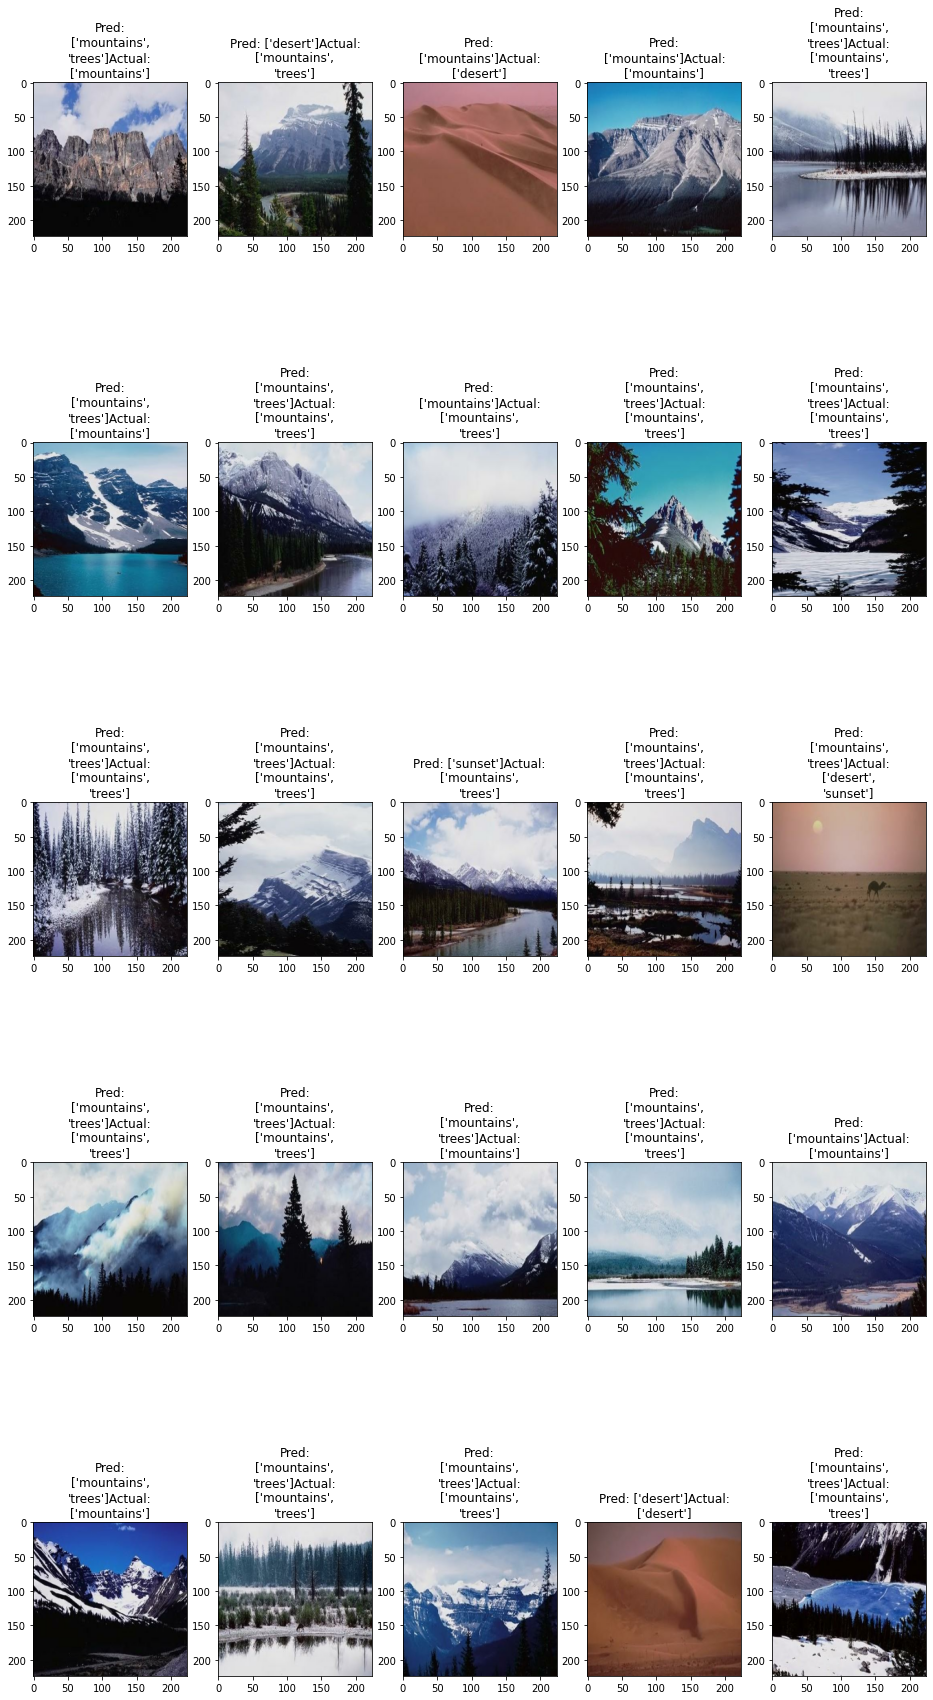

In [78]:
from textwrap import wrap

def show_samples(dataset):
    fig=plt.figure(figsize=(16, 16))
    fig.set_figheight(32)
    columns = 5
    rows = 5
    print(columns*rows,"samples from the dataset")
    predictions= model.predict(dataset.batch(batch_size=columns*rows).take(1))
    i=1
    for (pred, (a,b)) in zip(predictions, dataset.take(columns*rows)):
        fig.add_subplot(rows, columns, i)
        plt.imshow(np.squeeze(a))
        pred[pred>0.5]=1
        pred[pred<=0.5]=0
        plt.title('\n'.join(wrap("Pred: "+ str(covert_onehot_string_labels(LABELS, pred)), 16)) + '\n'.join(wrap("Actual: "+str(covert_onehot_string_labels(LABELS, b.numpy())), 16)))
        i=i+1
    plt.show()


show_samples(ds_val)

### Export model

In [ ]:
from datetime import date

export_path = f"./models/{date.today().isoformat()}_{str(int(time.time()))}"
model.save(export_path, save_format='tf')

export_path

In [ ]:
# import os
# # os.listdir("./models/")
# print(len(next(os.walk('./models/'))[1]))

In [ ]:
# https://storage.googleapis.com/vit_models/imagenet21k%2Bimagenet2012/R50%2BViT-B_16.npz

In [ ]:
# reloaded = tf.keras.models.load_model(export_path)

In [ ]:
# result_batch = model.predict(image_batch)
# reloaded_result_batch = reloaded.predict(image_batch)

## Test

In [32]:
import glob, os
test_data_dir = "./inputs/misumi_dataset_cleansing/hex_socket_flat_head_cap/"
test_data_dir = "./inputs/test/"
test_filenames = glob.glob(os.path.join(test_data_dir, "*.jpg"))

In [33]:
test_ds_size = len(test_filenames)
print("Number of images in folders: ", test_ds_size)

test_filelist_ds = tf.data.Dataset.from_tensor_slices(test_filenames[:])

Number of images in folders:  25


In [34]:
ds_test=test_filelist_ds.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)

In [35]:
ds_test_batched=ds_test.batch(BATCH_SIZE).cache().prefetch(tf.data.experimental.AUTOTUNE)

print("Number of batches in test: ", ds_test_batched.cardinality().numpy())

Number of batches in test:  2


25 samples from the dataset
[ 0. 88.  0.  0. 66.]
[ 0. 99.  0.  0.  2.]
[ 3. 99.  0.  0. 12.]
[ 2. 99.  0.  0. 19.]
[  0. 100.   0.   0.  14.]
[ 9. 79.  0.  0.  5.]
[ 0. 99.  0.  0.  0.]
[28. 33.  0.  0.  0.]
[ 3. 99.  0.  0.  2.]
[ 0. 98.  0.  0. 64.]
[ 0. 98.  0.  0.  1.]
[ 0. 12.  0.  0. 99.]
[ 2.  3. 71.  1. 11.]
[ 0. 74. 65.  1.  1.]
[ 0. 37. 97.  0.  0.]
[ 0. 84. 93.  1.  0.]
[ 2. 44. 90.  3.  0.]
[ 0.  1. 16.  0. 90.]
[ 0. 32.  1.  0. 88.]
[ 0.  0. 93.  0. 21.]
[  0.   0. 100.   1.   0.]
[  0.   0.   8.   0. 100.]
[ 0.  1. 90.  0.  1.]
[0. 2. 0. 0. 0.]
[  0.   0. 100. 100.   0.]


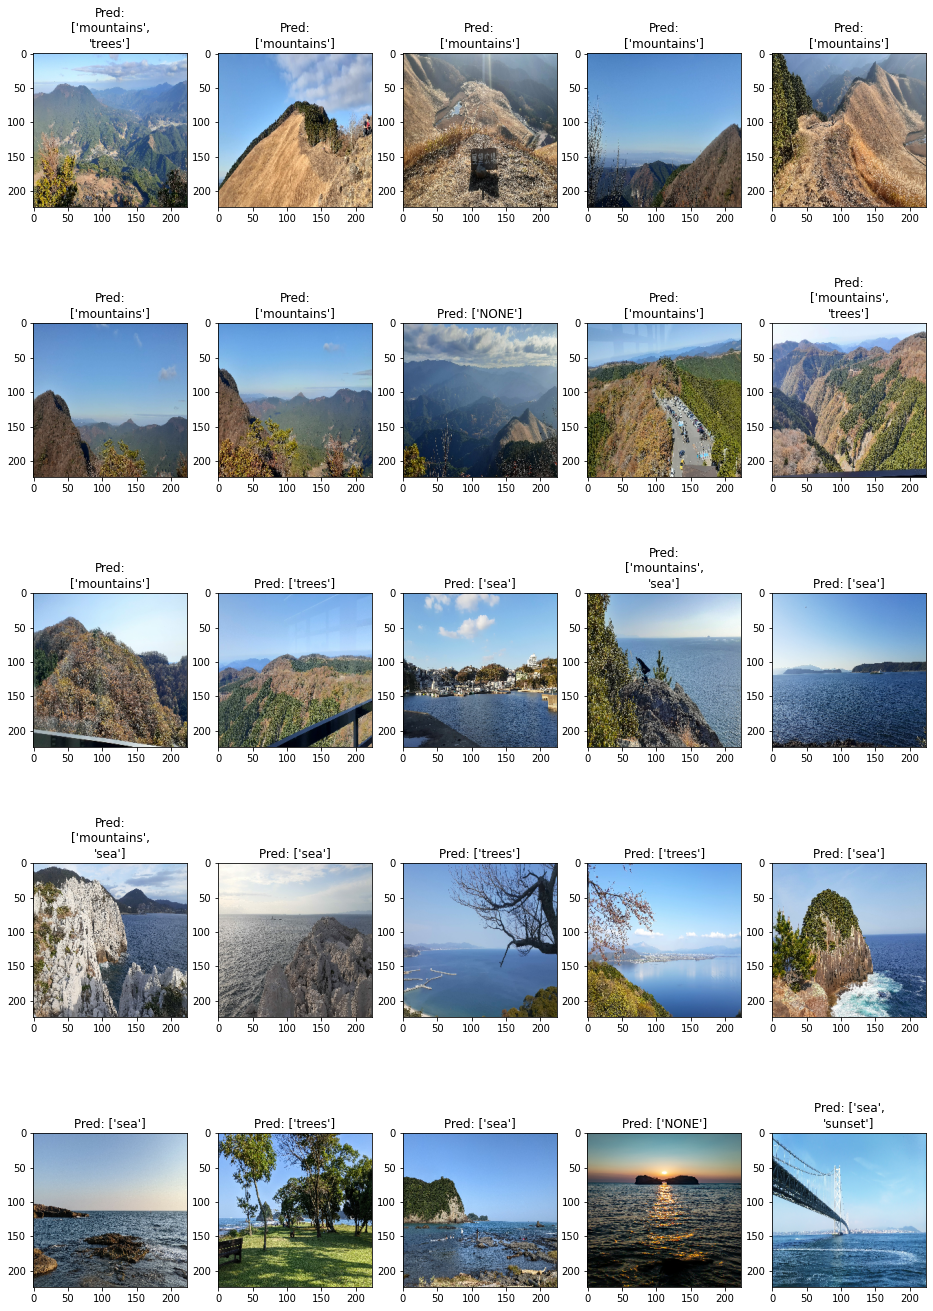

In [86]:
from textwrap import wrap

def show_samples(dataset):
    fig=plt.figure(figsize=(16, 24))
    columns = 5
    rows = 5
    print(columns*rows,"samples from the dataset")
    predictions= model.predict(dataset.batch(batch_size=columns*rows).take(1))
    i=1
    for (pred, (a,b)) in zip(predictions, dataset.take(columns*rows)):
        fig.add_subplot(rows, columns, i)
        plt.imshow(np.squeeze(a))
        print(np.round(pred*100))
        pred[pred>0.5]=1
        pred[pred<=0.5]=0
        plt.title('\n'.join(wrap("Pred: "+ str(covert_onehot_string_labels(LABELS, pred)), 16)))
        i=i+1
    plt.show()

show_samples(ds_test)